# 第一週 資料預處理與基本視覺化

# 課堂講授

### 使用到的packages
conda install -c anaconda pandas

conda install -c anaconda numpy

conda install -c conda-forge matplotlib

conda install -c anaconda seaborn

### 安裝完後，要把packages導入到此文件中

In [ ]:
## 載入套件
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import matplotlib.pyplot as plt
import os

# 基本作圖語法

In [ ]:
# 於Jupyter notebook中即時顯示作圖結果
%matplotlib inline

# 如在py檔中
# 則使用plt.show()指令將作圖結果秀出

## plt.figure() 畫布物件
「The top level container for all the plot elements」。

In [ ]:
fig = plt.figure()

## plt.axes() 軸物件
畫圖的根本物件

In [ ]:
ax = plt.axes()

## .plot(x,y) 畫2D圖

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y = np.sin(x)

ax.plot(x, y);

## 同張圖畫出多個結果

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax.plot(x, y_sin)
ax.plot(x, y_cos)

## .plot(x,y, color='顏色', linestyle='樣式') 為線段加上顏色樣式
https://matplotlib.org/stable/gallery/color/named_colors.html
<br/>
https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax.plot(x, y_sin, color='red', linestyle='dashdot');
ax.plot(x, y_cos, color='blue', linestyle='dashed');

## 加上標籤: 
## ax.set_xlabel('文字') X軸標籤
## ax.set_ylabel('文字') Y軸標籤
## ax.set_title('文字')圖片標題

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)

ax.set_title("A Sine Curve")
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.plot(x, y_sin, color='red', linestyle='dashdot');

## 圖標籤 ax.plot(label='文字') + plt.legend()

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax.set_title("A Sine Curve")
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.plot(x, y_sin, color='red', linestyle='dashdot', label='sin(x)');
ax.plot(x, y_cos, color='red', linestyle='dashdot', label='cos(x)');

plt.legend()

## 同時顯示複數個圖

### plt.figure().add_subplot(列, 行, 序號)

In [ ]:
fig = plt.figure()

# 1x3的矩陣的第1個位置中設定axes
ax_1 = fig.add_subplot(1, 3, 1)
ax_1.set_title('1')

# 1x3的矩陣的第2個位置中設定axes
ax_2 = fig.add_subplot(1, 3, 2)
ax_2.set_title('2')

# 1x3的矩陣的第3個位置中設定axes
ax_3 = fig.add_subplot(1, 3, 3)
ax_3.set_title('3')

plt.show()

In [ ]:
fig = plt.figure()

# 1x3的矩陣的第1個位置中設定axes
ax_1 = fig.add_subplot(3, 1, 1)
ax_1.set_title('1')

# 1x3的矩陣的第2個位置中設定axes
ax_2 = fig.add_subplot(3, 1, 2)
ax_2.set_title('2')

# 1x3的矩陣的第3個位置中設定axes
ax_3 = fig.add_subplot(3, 1, 3)
ax_3.set_title('3')

plt.show()

#### matplotlib還有很多種圖形，大家可以各自摸索一下
https://matplotlib.org/stable/plot_types/index

# 資料預處理實例演練

### Kaggle公開資料庫，裡面有各式各樣的資料集，有興趣的同學可以多多研究
https://www.kaggle.com/

### 此堂課中，我們會使用下列網址的資料集
https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

In [ ]:
## 載入資料
salary_path = os.path.join('.', 'Datasets', 'Salary Prediction', 'salary.csv')
salary_df = pd.read_csv(salary_path)

In [ ]:
## 看看資料裡有多少樣本與變項
salary_df.shape

In [ ]:
## 瞭解資料型態
salary_df.info()

In [ ]:
## 看看資料長什麼樣子
salary_df.head(10)

In [ ]:
# 簡單資料統計描述
salary_df.describe()

In [ ]:
# 簡單資料統計描述(全體)
salary_df.describe(include='all')

### 接著，我們對資料集做探索式資料分析(Exploratory Data Analysis, EDA)，首先要先把變數分類

In [ ]:
cate_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

### 發現缺失值

In [ ]:
# occupation多一類(14 ->15), workclass也是？？？
print(salary_df.occupation.unique())
print(salary_df.workclass.unique())

In [ ]:
## 轉換缺失值，缺失值在此資料集中以?表示(可從Data Set Description中得知)
salary_df[salary_df=="?"] = np.nan

In [ ]:
# 再看看資料實際的狀況
salary_df.info()

### 處理缺失值
首先我們要先確認有缺失值的變數為連續變數亦或是類別變數

此例中，三個有缺失值的變數皆為類別變數，加上缺失值比例不高，我們通常不會差補類別變數之缺失值，但此為教學，下列將示範如何用__眾數__做差補

In [ ]:
## 確認缺失值數量
salary_df.isna().sum()

In [ ]:
## 差補類別缺失值
for i in cate_col:
    salary_df[i] = salary_df[i].fillna(salary_df[i].mode()[0]) #[0]要寫出來，以取得標籤值

In [ ]:
## 再次確認缺失值的數量
salary_df.isna().sum()

### 離群值處理

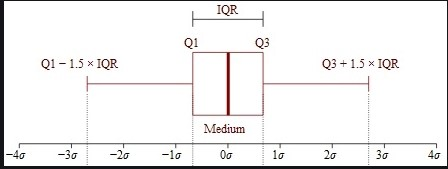

In [ ]:
# 對連續變數做預處理 (把離群值刪掉)
for i in salary_df[cont_col]:
    upper_limit = salary_df[i].mean() + (2 * salary_df[i].std())
    lower_limit = salary_df[i].mean() - (2 * salary_df[i].std())
    salary_df[i][(salary_df[i] > upper_limit) | (salary_df[i] < lower_limit)] = np.nan # 正負兩個標準差以外的皆為離群值

In [ ]:
# 確認各個連續變數有多少個被刪掉的離群值
salary_df.isna().sum()

In [ ]:
# 把被刪掉的離群值做差補 (我們可以用平均值、中位數等等來做差補) 
salary_df[cont_col] = salary_df[cont_col].fillna(salary_df[cont_col].mean()) #  mean或median不需要[0]，但mode需要

In [ ]:
# 確認是否還有缺失值
salary_df.isna().sum()

In [ ]:
# 確認資料型態
salary_df.head(10)

In [ ]:
# 沒問題的話，存csv，用作下周課程的資料集
salary_save = os.path.join('.', 'Datasets', 'Salary Prediction', 'salary_cleaned.csv')
salary_df.to_csv(salary_save, index=False)

# 基本視覺化

### 類別變數

In [ ]:
fig = plt.figure()
ax = plt.axes()

ticks = salary_df['workclass'].value_counts().index
counts = salary_df['workclass'].value_counts()

ax.bar(ticks, counts)
ax.set_title('workclass')
for i in range(len(ticks)):
    #ax.annotate(數字, (x軸的位置, y軸的位置))
    ax.annotate(counts[i], (i-0.1, counts[i]+100))

In [ ]:
fig = plt.figure()
ax = plt.axes()

ticks = salary_df['workclass'].value_counts().index
labels = salary_df['workclass'].value_counts().index.tolist()
counts = salary_df['workclass'].value_counts()


ax.bar(ticks, counts)
ax.set_title('workclass')

for i in range(len(ticks)):
    ax.annotate(counts[i], (i-0.1, counts[i]+100))
ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

### 連續變數

#### 分布曲線

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.hist(salary_df['age'], bins = 25, linewidth=0.5, edgecolor="white")
ax.set_title('age')

# 進階資訊視覺化

## seaborn介紹
https://seaborn.pydata.org/examples/index.html

In [ ]:
import seaborn as sns

## 相關係數圖

In [ ]:
round(salary_df.corr(),3)

In [ ]:
sns.heatmap(round(salary_df.corr(),3), vmin=-1, vmax=1, annot=True) #vmin, vmax: Values to anchor the colormap,
plt.show()

In [ ]:
# np.triu: upper triangle of an array
# np.tril: lower triangle of an array
mask = np.triu(np.ones_like(salary_df.corr(), dtype=np.bool))
sns.heatmap(round(salary_df.corr(),3), vmin=-1, vmax=1, annot=True, mask = mask)
plt.show()

## Violin Plot

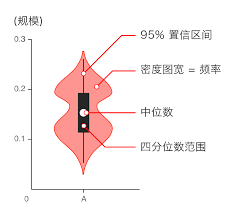

In [ ]:
sns.violinplot(x = salary_df['age'])
plt.title('age')
plt.show()

## Box Plot

In [ ]:
sns.boxplot(x = salary_df['age'])
plt.title('age')
plt.show()

### seaborn可以輕易做出多變項視覺化成果(matplotlib也可以，但寫起來會複雜許多)

#### 各種族的年齡分布

In [ ]:
fig = plt.figure()
ax = sns.violinplot(y = salary_df['age'], x = salary_df['race'])
ax.set_title('age by race groups')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [ ]:
fig = plt.figure()
ax = sns.boxplot(y = salary_df['age'], x = salary_df['race'])
ax.set_title('age by race groups')
ax.tick_params(axis='x', rotation=45)
plt.show()

#### 各種族的男女各別年齡分布

In [ ]:
fig = plt.figure()
ax = sns.violinplot(y = salary_df['age'], x = salary_df['race'], hue = salary_df['sex'], split=True)
ax.set_title('age by race groups by sex')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [ ]:
fig = plt.figure()
ax = sns.boxplot(y = salary_df['age'], x = salary_df['race'], hue = salary_df['sex'])
ax.set_title('age by race groups by sex')
ax.tick_params(axis='x', rotation=45)
plt.show()

#### Joint plot

In [ ]:
fig = plt.figure()
ax = sns.jointplot(x=salary_df['hours-per-week'], y=salary_df['age'], kind="hex") #hex 六邊形
plt.show()


#### 投資收入、工作時數、種族與性別的關係

In [ ]:
sns.relplot(x=salary_df['hours-per-week'], y=salary_df['capital-gain'], hue=salary_df['race'], size=salary_df['age'],
            sizes=(40, 400), alpha=.5, palette="muted", height=10)
plt.show()

# 上機練習

請使用下列網頁的資料集 (Heart Attack Analysis & Prediction Dataset)

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### 載入所需套件

In [18]:
## 載入套件
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

### 讀檔、查看前10筆資料

In [2]:
heart_path=os.path.join('.','Datasets','Heart attack','heart.csv')
ha_df1=pd.read_csv(heart_path)

ha_df1.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1
7,44,1,1,120,263,0,1,173,0,0,1
8,52,1,2,172,199,1,1,162,0,0,1
9,57,1,2,150,168,0,1,174,0,0,1


### 查看資料型態

In [3]:
ha_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   caa       303 non-null    int64
 10  output    303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


### 資料型態不如預期...

#### 先將欄位進行分類

In [4]:
cate_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa']
cont_col = ['age', 'trtbps', 'chol', 'thalachh']

#### 轉換資料型態

In [5]:
ha_df1[cate_col] = ha_df1[cate_col].astype(str)
ha_df1[cont_col] = ha_df1[cont_col].astype(float)

#### 再次查看資料型態

In [6]:
ha_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    object 
 9   caa       303 non-null    object 
 10  output    303 non-null    int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 26.2+ KB


## 連續變數中，值不在正負1.5IQR的為離群值;類別變數中，不在codebook中的值要以空值取代

### 連續變數例外值處理

In [7]:
for i in cont_col:
    q1=ha_df1[i].quantile(0.25)
    q3=ha_df1[i].quantile(0.75)
    iqr=q3-q1
    inner_fence=1.5*iqr

    inner_fence_low=q1-inner_fence
    inner_fence_upp=q3+inner_fence
    ha_df1[i][(ha_df1[i]<inner_fence_low) | (ha_df1[i]>inner_fence_upp)]=np.nan

### 查看處理後資料有多少空值

In [10]:
ha_df1[cate_col].isna().sum()

age         0
sex         0
cp          0
trtbps      9
chol        5
fbs         0
restecg     0
thalachh    1
exng        0
caa         0
output      0
dtype: int64

### 類別變數例外值處理

In [11]:
ha_df1["sex"][~ha_df1["sex"].isin(["0","1"])] = np.nan # ~為not，之前已把此些變數變為str，所以要加引號，不然讀取不到
ha_df1["cp"][~ha_df1["cp"].isin(["0","1","2","3"])] = np.nan
ha_df1["fbs"][~ha_df1["fbs"].isin(["0","1"])] = np.nan
ha_df1["restecg"][~ha_df1["restecg"].isin(["0","1","2"])] = np.nan
ha_df1["exng"][~ha_df1["exng"].isin(["0","1"])] = np.nan
ha_df1["caa"][~ha_df1["caa"].isin(["0","1","2","3"])] = np.nan

### 查看處理後資料有多少空值

In [12]:
ha_df1[cate_col].isna().sum()

sex        0
cp         0
fbs        0
restecg    0
exng       0
caa        5
dtype: int64

## 用中位數差補被截斷的離群值;用眾數差補被截斷的類別變數的值

### 連續值補值

In [13]:
for i in cont_col:
    ha_df1[i]=ha_df1[i].fillna(ha_df1[i].median())

In [14]:
# 確認連續變數是否還有缺失值
ha_df1[cont_col].isna().sum()

age         0
trtbps      0
chol        0
thalachh    0
dtype: int64

### 類別值補值

In [15]:
for i in cate_col:
    ha_df1[i]=ha_df1[i].fillna(ha_df1[i].mode()[0])

In [16]:
# 確認類別變數是否還有缺失值
ha_df1[cate_col].isna().sum()

sex        0
cp         0
fbs        0
restecg    0
exng       0
caa        0
dtype: int64

## 劃出連續變數的相關係數Heat map

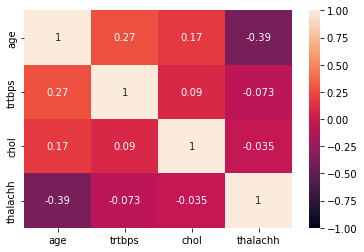

In [19]:
sns.heatmap(round(ha_df1[cont_col].corr(),3),vmin=-1,vmax=1,annot=True)
plt.show()

## 畫出男女分布圓餅圖

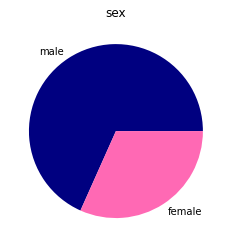

In [20]:
plt.pie(ha_df1["sex"].value_counts(),labels=["male","female"],colors=["navy","hotpink"])
plt.title("sex")
plt.show()